## Setup Models

In [ ]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 1.4 MB/s eta 0:00:00


In [ ]:
from langchain_openai import AzureChatOpenAI
from langchain_openai import AzureOpenAIEmbeddings
import os

#Setup the environment variables
os.environ["AZURE_OPENAI_API_KEY"]="<YOUR KEY>"
os.environ["AZURE_OPENAI_ENDPOINT"]="<YOUR END POINT>"

#Setup the LLM
model = AzureChatOpenAI(
    azure_deployment="gpt-4o" ,
    api_version="2024-12-01-preview",
    model="gpt-4o"
)

## 06.03. Using agents as Graph nodes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reuse the agents created in the previous chapters by importing their notebooks
#This will also import the chatbot and execute the code available.
#Ignore / hide the code output and use only the agents

#import the Product QnA Agent
%run "/content/drive/MyDrive/LinkedIn Learning/LangChain/Product QnA Agentic chatbot.ipynb"
print("===============================================================")
#import the orders agents
%run "/content/drive/MyDrive/LinkedIn Learning/LangChain/Orders Chatbot with custom agent.ipynb"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 8.8 MB/s eta 

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


================================ Human Message =================================

What are the features and pricing for GammaAir?


ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given


================================== Ai Message ==================================
Tool Calls:
  Get_Product_Features (call_5lAmcdsuf2VTu8dzdbg9ENB4)
 Call ID: call_5lAmcdsuf2VTu8dzdbg9ENB4
  Args:
    query: GammaAir
  get_laptop_price (call_uhI42cCDKN79LBZduAmRGUss)
 Call ID: call_uhI42cCDKN79LBZduAmRGUss
  Args:
    laptop_name: GammaAir
================================= Tool Message =================================
Name: get_laptop_price

1399
================================== Ai Message ==================================

The GammaAir X is a lightweight and portable laptop that combines high performance with a sleek design. Its features include:

- **CPU**: AMD Ryzen 7 processor
- **Memory**: 32GB DDR4 RAM
- **Storage**: 512GB NVMe SSD
- **Design**: Thin and light form factor, ideal for portability and high-performance tasks.

The price for GammaAir X is **$1,399**. Would you like more information or assistance with purchasing?
----------------------------------------
USER : Hello

In [ ]:
import functools
# Helper function to invoke an agent
def agent_node(state, agent, name, config):

    #extract thread-id from request for conversation memory
    thread_id=config["metadata"]["thread_id"]
    #Set the config for calling the agent
    agent_config = {"configurable": {"thread_id": thread_id}}

    #Pass the thread-id to establish memory for chatbot
    #Invoke the agent with the state
    result = agent.invoke(state, agent_config)

    # Convert the agent output into a format that is suitable to append to the global state
    if isinstance(result, ToolMessage):
        pass
    else:
        final_result=AIMessage(result['messages'][-1].content)
    return {
        "messages": [final_result]
    }

#partial - sets up agent but not called until explicitly called.
'''You can use partial from functools to freeze a certain number of arguments from a function and create a new, simplified function.
It returns a new partial object which when called will behave like a function called with the positional args and keywords.'''
#Create the product QnA node
product_QnA_node=functools.partial(agent_node,
                                   agent=product_QnA_agent,
                                   name="Product_QnA_Agent")
#Create the Orders node
#For a custom agent, the agent graph need to be provided as input
orders_node=functools.partial(agent_node,
                              agent=orders_agent.agent_graph,
                              name="Orders_Agent")


## 06.04. Create the Routing Agent & Chatbot

In [ ]:
#Creating the routing agent

from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, END
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, ToolMessage
import operator

class RouterAgentState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]

class RouterAgent:

    def __init__(self, model, system_prompt, smalltalk_prompt, debug=False):

        self.system_prompt=system_prompt
        self.smalltalk_prompt=smalltalk_prompt
        self.model=model
        self.debug=debug

        router_graph=StateGraph(RouterAgentState)
        router_graph.add_node("Router",self.call_llm)
        router_graph.add_node("Product_Agent",product_QnA_node)
        router_graph.add_node("Orders_Agent",orders_node)
        router_graph.add_node("Small_Talk", self.respond_smalltalk)

        router_graph.add_conditional_edges(
            "Router",
            self.find_route,
            {"PRODUCT": "Product_Agent",
             "ORDER" : "Orders_Agent",
             "SMALLTALK" : "Small_Talk",
             "END": END }
        )

        #One way routing, not coming back to router
        router_graph.add_edge("Product_Agent",END)
        router_graph.add_edge("Orders_Agent",END)
        router_graph.add_edge("Small_Talk",END)

        #Set where there graph starts
        router_graph.set_entry_point("Router")
        #The router node itself does not keep conversation memory, as routing decisions are independent. Althought, memory saver can be added if required.
        self.router_graph = router_graph.compile()

    def call_llm(self, state:RouterAgentState):
        messages=state["messages"]
        if self.debug:
            print(f"Call LLM received {messages}")

        #If system prompt exists, add to messages in the front
        if self.system_prompt:
            messages = [SystemMessage(content=self.system_prompt)] + messages

        #invoke the model with the message history
        result = self.model.invoke(messages)

        if self.debug:
            print(f"Call LLM result {result}")
        return { "messages":[result] }

    def respond_smalltalk(self, state:RouterAgentState):
        messages=state["messages"]
        if self.debug:
            print(f"Small talk received: {messages}")

        #If system prompt exists, add to messages in the front

        messages = [SystemMessage(content=self.smalltalk_prompt)] + messages

        #invoke the model with the message history
        result = self.model.invoke(messages)

        if self.debug:
            print(f"Small talk result {result}")
        return { "messages":[result] }

    def find_route(self, state:RouterAgentState):
        last_message = state["messages"][-1]
        if self.debug:
            print("Router: Last result from LLM : ", last_message)

        #Set the last message as the destination
        destination=last_message.content

        if self.debug:
            print(f"Destination chosen : {destination}")
        return destination


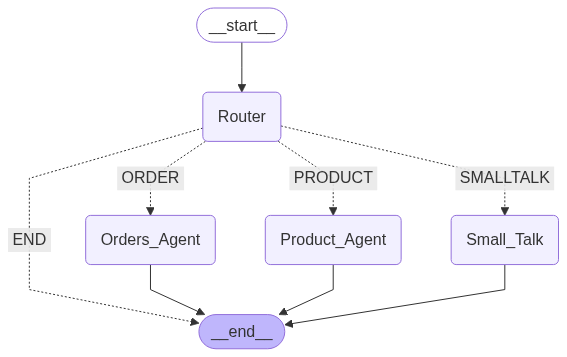

In [ ]:
#Create the chatbot
from IPython.display import Image

#Setup the system problem
system_prompt = """
You are a Router, that analyzes the input query and chooses 4 options:
SMALLTALK: If the user input is small talk, like greetings and good byes.
PRODUCT: If the query is a product question about laptops, like features, specifications and pricing.
ORDER: If the query is about orders for laptops, like order status, order details or update order quantity
END: Default, when its neither PRODUCT or ORDER.

The output should only be just one word out of the possible 4 : SMALLTALK, PRODUCT, ORDER, END.
"""

smalltalk_prompt="""
If the user request is small talk, like greetings and goodbyes, respond professionally.
Mention that you will be able to answer questions about laptop product features and provide order status and updates.
"""

router_agent = RouterAgent(model,
                           system_prompt,
                           smalltalk_prompt,
                           debug=False)

Image(router_agent.router_graph.get_graph().draw_mermaid_png())

## 06.05 Execute the Routing chatbot

In [ ]:
#Execute a single request
messages=[HumanMessage(content="Tell me about the features of SpectraBook")]
result=router_agent.router_graph.invoke({"messages":messages},config)
for message in result['messages']:
    print(message.pretty_repr())

================================ Human Message =================================

Tell me about the features of SpectraBook
================================== Ai Message ==================================

PRODUCT
================================== Ai Message ==================================

The SpectraBook S is a high-performance laptop designed for power users. Here are its key features:

- **Processor**: Equipped with an Intel Core i9 processor, making it ideal for demanding computational tasks.
- **Memory**: Comes with 64GB of RAM, allowing smooth multitasking even with intensive applications.
- **Storage**: Offers a massive 2TB SSD, providing ample space for storage and fast data transfers.
- **Use Case**: Perfect for intensive tasks like video editing, 3D rendering, and other workstation-level activities.

The SpectraBook S prioritizes performance, making it an excellent choice for professionals requiring a workstation-class device.


In [ ]:
#Execute a single request
messages=[HumanMessage(content="What is the status of order ORD-7311?")]
result=router_agent.router_graph.invoke({"messages":messages},config)
for message in result['messages']:
    print(message.pretty_repr())

================================ Human Message =================================

What is the status of order ORD-7311?
================================== Ai Message ==================================

ORDER
================================== Ai Message ==================================

Here is the current status of your order **ORD-7311**:

- **Product Ordered:** NanoEdge Flex  
- **Quantity Ordered:** 3  
- **Delivery Date:** October 19, 2024  

Let me know if I can assist you further!


In [ ]:
import uuid
#Send a sequence of messages to chatbot and get its response
#This simulates the conversation between the user and the Agentic chatbot
user_inputs = [
    "How are you doing?",
    "Please show me the details of the order ORD-7311",
    "Can you add one more of that laptop to the order? ",
    "Tell me about the features of SpectraBook laptop",
    "How much does it cost?",
    "Bye"
]

#Create a new thread
config = {"configurable": {"thread_id": str(uuid.uuid4())}}

for input in user_inputs:
    print(f"----------------------------------------\nUSER : {input}")
    #Format the user message
    user_message = {"messages":[HumanMessage(input)]}
    #Get response from the agent
    ai_response = router_agent.router_graph.invoke(user_message,config=config)
    #Print the response
    print(f"\nAGENT : {ai_response['messages'][-1].content}")


----------------------------------------
USER : How are you doing?

AGENT : Hello! I'm here and ready to assist you. Let me know if you need information about laptop product features or help with your order status and updates. How can I assist you today?
----------------------------------------
USER : Please show me the details of the order ORD-7311

AGENT : Here are the details for order ORD-7311:

- **Product Ordered:** NanoEdge Flex
- **Quantity Ordered:** 3 units
- **Delivery Date:** October 19, 2024
----------------------------------------
USER : Can you add one more of that laptop to the order? 

AGENT : The quantity for order ORD-7311 has been successfully updated. The new quantity is now 4 units of the NanoEdge Flex laptop.
----------------------------------------
USER : Tell me about the features of SpectraBook laptop

AGENT : The **SpectraBook S** laptop is designed for power users and comes with the following features:

- **Processor:** Intel Core i9 processor for intense co